In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# La régression logistique

- Méthode introduite par les statisticiens vers la fin des années 60 et popularisée par Andersen (1982).
- Permet de s'affranchir des hypothèses restrictives associées aux méthode linéaires paramétriques.
- Hypothèse:
    - Logarithme des rapports de probabilités conditionnelles des classes pour une entrée $x$ est linéaire par rapport à $x$.

$$\ln{\Big(\frac{\mathbb{P}(X =x | Y = 1)}{\mathbb{P}(X = x | Y = -1)}\Big)} = w_0 + \langle \bar{w}, x \rangle$$


- La probabilité à posteriori:

$$\mathbb{P}(Y = 1 | X = x) = \frac{1}{1 + e^{-(\tilde{w} + \langle \bar{w}, x \rangle)}}$$

- On utilise cette transformation dans le cas où y prend un valeur binaire.


In [3]:
# définition de la fonction sigmoid ou logistique
# N.B Dans le cas particulier de la régression logistique x
# correspond à la combinaison linéaire de w et x (cf plus haut)
def logistic(x):
    return 1 / (1 + np.exp(-x))

## Fonction de coût


$$\hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}\ln{(1 + e^{-y_ih_w(x_i)})}$$

Selon que la valeur de $y \in \left\{-1, 1\right\}$ ou que $y \in \left\{0, 1\right\}$

### Pour $y \in \left\{0, 1\right\}$


$$
\mathbb{P}(y=1 | x; \theta)  = h_\theta(x)
$$
$$ \mathbb{P}(y=0 | x; \theta)  = 1 - h_\theta(x) $$

Ainsi:


$$ p(y | x; \theta) = (h_\theta(x))^y (1 - h_\theta(x)^{1-y}$$

L'équation ci-dessus correspond à une modélisation de Bernoulli. Partant du principe que les observations sont indépendantes. La fonction de vraisemblance correspond à:

$$ \mathcal{L} = \prod_{i = 1}^{m} p(y^{(i)} | x^{(i)}; \theta)$$
ce qui correspond à:

$$ \mathcal{L} = \prod_{i = 1}^{m}(h_\theta(x))^{y^{(i)}} (1 - h_\theta(x))^{{1-y}^{(i)}}$$

Formule pour la maximisation de la log-vraisemblance:

$$ \log(\mathcal{L}) = \sum_{i=1}^{m} y^{(i)} \log h(x^{(i)}) + (1 - y^{(i)}) \log(1 - h(x^{(i)})$$

Il existe toutefois une seconde notation possible dans le cas où $y \in \left\{-1, 1 \right\}$




/home/iaamini/Documents/ML_practice/ML_fundamentals/virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


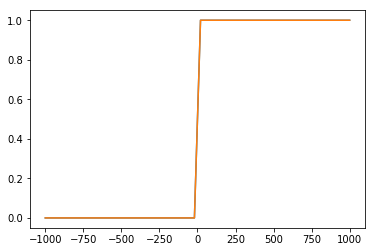

In [4]:
x= np.linspace(-1000, 1000, 101)
plt.plot(x, logistic(x))
plt.plot(x, stable_logistic(x))

### Le gradient de la fonction:

$$ \nabla \hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}y_i \Big(1 - \frac{1}{1 + e^{-y_ih_w(x_i)}}\Big) \times x_i $$

- Pour l'apprentissage des paramètres du modèle de la régression logistique en utilisant la méthode du gradient conjugué  pour minimser 

In [5]:
def gradient_log_s_loss(w, X, y):
    # defining dim variables
    n, d = X.shape
    
    # initiating g: gradient vector
    g = np.zeros(d+1)
    
    # Computing dot product
    ps = np.dot(X, w[1:]) + w[0]
#     print((1-sigmoid(y*ps)).shape)
#     print(X.shape)
#     print(np.dot(1-sigmoid(y*ps), X).shape)
#     print(np.dot(1-sigmoid(y*ps), X).shape)
    g[1:] = np.dot(1-logistic(y*ps), X)
    g[0] = (1-(logistic(y*ps)) * y).sum()
#     print(g[0])
    g /= n
    return g


In [6]:
X = np.arange(-10., 10, 1)
# bias = np.ones(len(X))
# X = np.vstack([X,bias]) # Add intercept
w = np.random.random(2)

y = np.dot(X[:, None], w[1:]) + w[0]
y = logistic(y)
y = np.random.binomial(1., y)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
def logistic_surrogate_loss(w, X, y):
    # Computing the dot product
    n, d = X.shape
    ps = np.dot(X, w[1:]) + w[0]
    loss = logistic(y*ps).sum() / n
    return loss

In [9]:
logistic_surrogate_loss(w, X[:, np.newaxis], y)

0.6990452965966952

In [10]:
X

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])